<a href="https://colab.research.google.com/github/jeangomes/mvp-pos-sprint1/blob/main/MVP_Pos_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Curso de Pós Graduação em Data Science - Sprint 1
Estarei utilizando um dataset do Kaggle: [link](https://www.kaggle.com/datasets/leomartinelli/bullying-in-schools)

É sobre bullyng nas escolas, baseado em uma pesquisa na Argentina com mais de 50 mil estudantes.


In [ ]:
!pip install squarify

In [94]:
# importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import squarify

### Leitura e carga do dataset para um dataframe

In [45]:
# importando dados a partir de uma url de um arquivo CSV para um dataframe

# url do arquivo com os dados para importar
url_dados = 'https://raw.githubusercontent.com/jeangomes/mvp-pos-sprint1/main/Bullying_2018.csv'

# carga do dataset através da leitura da url
df = pd.read_csv(url_dados, sep=";", engine='python')

### Verificações e **análise exploratória de dados** sobre a estrurura e composição do dataframe

In [46]:
# verificando que df é um dataframe
type(df)

pandas.core.frame.DataFrame

In [47]:
# verificando os tipos das colunas do dataframe
df.dtypes

record                                               int64
Bullied_on_school_property_in_past_12_months        object
Bullied_not_on_school_property_in_past_12_months    object
Cyber_bullied_in_past_12_months                     object
Custom_Age                                          object
Sex                                                 object
Physically_attacked                                 object
Physical_fighting                                   object
Felt_lonely                                         object
Close_friends                                       object
Miss_school_no_permission                           object
Other_students_kind_and_helpful                     object
Parents_understand_problems                         object
Most_of_the_time_or_always_felt_lonely              object
Missed_classes_or_school_without_permission         object
Were_underweight                                    object
Were_overweight                                     obje

In [48]:
# exibindo as primeiras linhas
df.head(5)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [49]:
# exibindo as últimas linhas
df.tail(15)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
56966,57081,Yes,No,No,16 years old,Male,0 times,0 times,Rarely,3 or more,1 or 2 days,Rarely,Sometimes,No,Yes,No,No,No
56967,57082,No,Yes,No,16 years old,Male,2 or 3 times,0 times,Rarely,2,0 days,Rarely,Most of the time,No,No,No,No,No
56968,57083,No,No,No,16 years old,Male,0 times,0 times,Sometimes,2,3 to 5 days,Rarely,Never,No,Yes,,,
56969,57084,No,No,No,16 years old,Male,0 times,0 times,Never,3 or more,0 days,Never,Never,No,No,No,No,No
56970,57085,No,No,No,16 years old,Male,0 times,0 times,Sometimes,3 or more,1 or 2 days,Most of the time,Rarely,No,Yes,,,
56971,57086,Yes,Yes,No,16 years old,Male,0 times,0 times,Most of the time,3 or more,0 days,Sometimes,Rarely,Yes,No,No,No,No
56972,57087,No,Yes,No,16 years old,Male,0 times,0 times,Rarely,3 or more,3 to 5 days,Rarely,Most of the time,No,Yes,No,No,No
56973,57088,No,No,No,16 years old,Male,0 times,0 times,Rarely,2,3 to 5 days,Sometimes,Rarely,No,Yes,,,
56974,57089,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
56975,57090,No,No,Yes,15 years old,Male,12 or more times,2 or 3 times,Rarely,3 or more,0 days,Most of the time,Sometimes,No,No,No,No,No


In [50]:
# exibindo os nomes das colunas
df.columns

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese'],
      dtype='object')

In [51]:
# exibindo as dimensões do dataset
df.shape

(56981, 18)

In [52]:
# exibindo a quantidade de linhas por coluna
df.count()

record                                              56981
Bullied_on_school_property_in_past_12_months        56981
Bullied_not_on_school_property_in_past_12_months    56981
Cyber_bullied_in_past_12_months                     56981
Custom_Age                                          56981
Sex                                                 56981
Physically_attacked                                 56981
Physical_fighting                                   56981
Felt_lonely                                         56981
Close_friends                                       56981
Miss_school_no_permission                           56981
Other_students_kind_and_helpful                     56981
Parents_understand_problems                         56981
Most_of_the_time_or_always_felt_lonely              56981
Missed_classes_or_school_without_permission         56981
Were_underweight                                    56981
Were_overweight                                     56981
Were_obese    

In [53]:
#df.info()

In [54]:
# exibindo um sumário estatístico
df.describe()

,record
count,56981.000000
mean,28535.389832
std,16479.971553
min,1.000000
25%,14263.000000
50%,28522.000000
75%,42804.000000
max,57095.000000


In [55]:
# mostrando o dataframe ordenado por uma coluna
df.sort_values(by='Close_friends')

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
45574,45645,No,No,No,15 years old,Male,0 times,0 times,Never,,3 to 5 days,Most of the time,Always,No,Yes,No,No,No
38608,38674,No,No,No,14 years old,Female,0 times,0 times,Most of the time,,6 to 9 days,Sometimes,Rarely,Yes,Yes,No,Yes,Yes
30433,30465,Yes,No,No,14 years old,Male,0 times,0 times,Most of the time,,6 to 9 days,Sometimes,Most of the time,Yes,Yes,No,No,No
27228,27260,No,Yes,No,14 years old,Female,4 or 5 times,0 times,Never,,0 days,Always,Never,No,No,,,
44301,44371,Yes,No,Yes,13 years old,Male,0 times,4 or 5 times,Never,,0 days,Sometimes,Sometimes,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,29980,No,No,Yes,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Never,No,No,,,
29949,29981,No,No,Yes,14 years old,Male,0 times,0 times,Sometimes,3 or more,0 days,Sometimes,,No,No,,,
29950,29982,No,No,,14 years old,Female,0 times,0 times,Never,3 or more,0 days,Always,Sometimes,No,No,No,No,No
29943,29975,No,No,No,15 years old,Male,0 times,0 times,Never,3 or more,1 or 2 days,Always,Always,No,Yes,,,


In [56]:
# ordenando em ordem descendente
df.sort_values(by='Close_friends', ascending=False)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
20669,20697,No,No,Yes,13 years old,Male,1 time,4 or 5 times,Sometimes,3 or more,6 to 9 days,Sometimes,Always,No,Yes,,,
27128,27160,No,No,No,15 years old,Female,0 times,0 times,Sometimes,3 or more,0 days,Most of the time,Never,No,No,No,No,No
27121,27153,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Rarely,Most of the time,No,No,,,
27122,27154,No,No,No,15 years old,Male,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,No,No,No
27123,27155,Yes,Yes,Yes,14 years old,Female,0 times,1 time,Never,3 or more,0 days,Rarely,Always,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,24767,Yes,Yes,Yes,15 years old,Male,12 or more times,0 times,Most of the time,,1 or 2 days,Never,Always,Yes,Yes,,,
47496,47574,No,No,No,17 years old,Male,0 times,1 time,Never,,1 or 2 days,Sometimes,Always,No,Yes,No,No,No
12710,12727,No,No,No,16 years old,Male,0 times,0 times,Never,,1 or 2 days,Most of the time,Always,No,Yes,No,Yes,No
24840,24870,No,No,Yes,15 years old,Female,0 times,0 times,Rarely,,0 days,Always,Most of the time,No,No,,,


In [57]:
# selecionando uma coluna específica
df['Bullied_on_school_property_in_past_12_months']

0        Yes
1         No
2         No
3         No
4         No
        ... 
56976     No
56977     No
56978     No
56979     No
56980     No
Name: Bullied_on_school_property_in_past_12_months, Length: 56981, dtype: object

In [58]:
# selecionando um subconjunto de linhas consecutivas
df[7:11]

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,
10,11,No,No,No,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,No,Yes,No,No,No


In [59]:
# selecionando um subconjunto de colunas para todas as linhas
df.loc[:, ['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months']]

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months
0,Yes,Yes,
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
...,...,...,...
56976,No,Yes,No
56977,No,No,No
56978,No,No,No
56979,No,Yes,No


In [60]:
# selecionando um subconjunto linhas e colunas
df.loc[7:11, ['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months']]

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months
7,No,No
8,No,No
9,Yes,No
10,No,No
11,Yes,Yes


In [61]:
# selecionando linhas segundo um critério
df[df['Close_friends'] != '3 or more']

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,
17,18,No,No,No,13 years old,Male,0 times,0 times,Never,0,1 or 2 days,Sometimes,,No,Yes,,,
21,22,,No,No,14 years old,Male,0 times,0 times,Never,2,0 days,Rarely,Never,No,No,,,
23,24,No,No,No,14 years old,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,Yes,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56968,57083,No,No,No,16 years old,Male,0 times,0 times,Sometimes,2,3 to 5 days,Rarely,Never,No,Yes,,,
56973,57088,No,No,No,16 years old,Male,0 times,0 times,Rarely,2,3 to 5 days,Sometimes,Rarely,No,Yes,,,
56977,57092,No,No,No,16 years old,Male,0 times,0 times,Rarely,1,0 days,Sometimes,Never,No,No,,,
56979,57094,No,Yes,No,16 years old,Female,0 times,0 times,Sometimes,2,0 days,Most of the time,Rarely,No,No,,,


In [62]:
# verificando nulls no dataset
#df.isnull().sum()
#df.isna().sum()
df.isin([' ']).sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

## Config de cores para gráficos

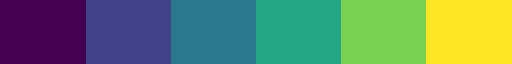

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [63]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

##- Pré-Processamento de Dados
### Operações nas colunas - Renomeando e convertendo/transformando algumas.

In [354]:
# Renomeia Colunas copiando para um novo dataframe
dados = df.rename(columns={
    'Bullied_on_school_property_in_past_12_months': 'Bullying na escola',
    'Bullied_not_on_school_property_in_past_12_months': 'Bullying fora da escola', 
    'Cyber_bullied_in_past_12_months' : 'Bullying virtual',
    'Custom_Age': 'Idade',
    'Sex': 'Sexo',
    'Physically_attacked': 'Atacado fisicamente',
    'Physical_fighting': 'Luta física',
    'Miss_school_no_permission': 'Qtd faltas sem permissão',
    'Other_students_kind_and_helpful': 'Alunos gentis',
    'Parents_understand_problems': 'Pais entendem',
    'Most_of_the_time_or_always_felt_lonely': 'Se sente muito sozinho',
    'Missed_classes_or_school_without_permission': 'Falta sem permissão',
    'Were_underweight': 'Abaixo do peso',
    'Were_overweight': 'Acima do peso',
    'Were_obese': 'Obeso'
    })

# Removendo coluna desnecessária
dados.drop(['record'], axis=1, inplace= True)

# Removendo string da coluna
dados['Close_friends'] = dados['Close_friends'].str.replace(' or more', '')

In [355]:
# remove strings da coluna de idade e mantem somente digitos
dados['Idade'] = dados['Idade'].str.replace(r'\D+','', regex=True)

In [356]:
# convertendo valores com string vazias para numpy nan
dados.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [357]:
# Transforma idade
dados['Idade'] = dados['Idade'].replace(np.nan, 0)
dados['Idade'] = dados['Idade'].astype(int)
idade_media = round(dados['Idade'].mean())
dados['Idade'] = dados['Idade'].replace(0, idade_media)
#dados.groupby('Idade')['Idade'].count()

In [ ]:
#dados.isin([' ']).sum()
dados.isnull().sum()

In [ ]:
for col in dados.columns:
    percent_missing_value = (dados[col].isnull().sum()/dados.shape[0]) * 100
    print("Percent of missing values for the column ", col, " is ", percent_missing_value)

In [360]:
value_counts = dados['Atacado fisicamente'].value_counts()

# Print the distribution
print(value_counts) # verificar transformações
# cria um dicionario para mapear as categorias em valor numerico
mapping = {'0 times': 0, '1 time': 1, '2 or 3 times': 2, '4 or 5 times': 3, '6 or 7 times': 4, '8 or 9 times': 5, '10 or 11 times': 6, '12 or more times': 7}
# cria nova coluna com valores numericos mapeados
dados['amount_attacks'] = dados['Atacado fisicamente'].map(mapping)

0 times             46997
1 time               5248
2 or 3 times         2405
12 or more times      790
4 or 5 times          695
6 or 7 times          302
8 or 9 times          189
10 or 11 times        115
Name: Atacado fisicamente, dtype: int64


In [28]:
#dados.groupby('amount_attacks')['amount_attacks'].count()

In [29]:
#dados.groupby('Bullying na escola')['Bullying na escola'].count()

In [30]:
#df.loc[(df['Bullying na escola'] == 'Yes') & (df['Sexo'] == 'Male')]['Bullying na escola'].count()
#dados.query("`Bullying na escola` == 'Yes' and `Sexo` == 'Male'")['Bullying na escola'].count()

In [31]:
#dados.loc[(dados['Bullying na escola'] == 'Yes') & (dados['Sexo'] == 'Female')]['Bullying na escola'].count()

In [361]:
dadosNotBullyng = dados[dados['Bullying na escola'] != 'Yes']
qtdFemMasNotBullyng = dadosNotBullyng['Sexo'].value_counts().sort_index(ascending=True)

In [362]:
dadosBullyng = dados[dados['Bullying na escola'] == 'Yes']
qtdFemMasBullyng = dadosBullyng['Sexo'].value_counts().sort_index(ascending=True)

##- Plotando alguns gráficos com algumas análises e comparações
### Gráfico de barras

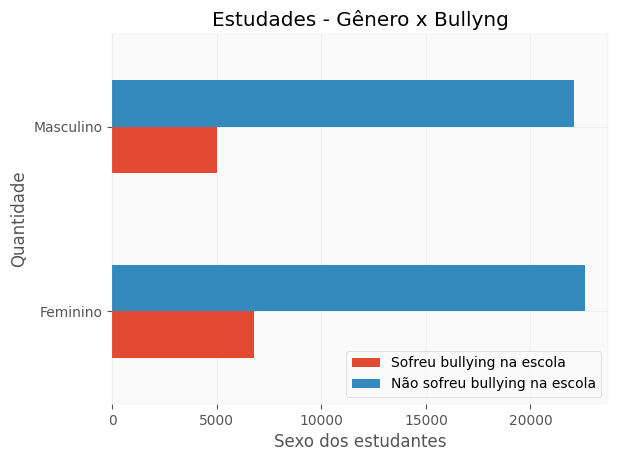

In [366]:
data = {'category': ['Feminino', 'Masculino'], 'Sofreu bullying na escola': qtdFemMasBullyng.array, 'Não sofreu bullying na escola': qtdFemMasNotBullyng.array}
df_sex_bullying_or_not = pd.DataFrame(data)
df_sex_bullying_or_not.set_index('category', inplace=True)

# plot a stacked bar chart
ax = df_sex_bullying_or_not.plot(kind='barh', rot=0)

# set the chart title and axis labels
plt.title('Estudades - Gênero x Bullyng')
plt.xlabel('Sexo dos estudantes')
plt.ylabel('Quantidade')

# show the chart
plt.show()

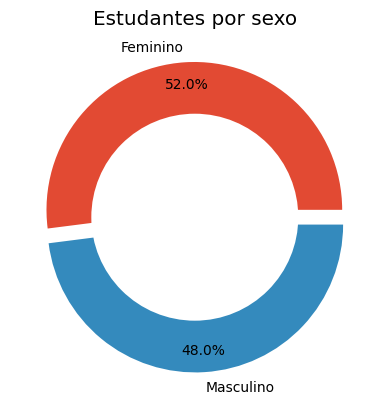

In [367]:
grouped_data = dados.groupby('Sexo')['Sexo'].count()
percentage_data = grouped_data / grouped_data.sum() * 100
percentage_data = percentage_data.rename(index={' ': 'Desconhecido', 'Female': 'Feminino', 'Male': 'Masculino'})
labels = percentage_data.index
quantidade = percentage_data.values

# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(quantidade, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# desnha um circulo
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# adiciona o circulo ao Pie chart
fig.gca().add_artist(centre_circle)
  
plt.title('Estudantes por sexo')
plt.show()

In [368]:
# ordenando e agrupando o dataframe pela coluna de idade
group_by_age = dados.sort_values(by='Idade', ascending=False).groupby('Idade')['Idade'].count()#.value_counts()
group_by_age = group_by_age.rename(index={'': 'Ausente'})

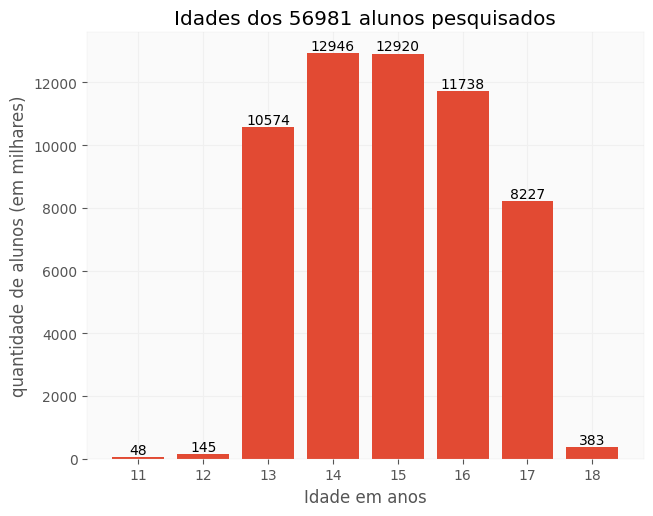

In [371]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots()

# Plota o gráfico de barras
ax.bar(x = group_by_age.index, height = group_by_age.values)

# Acrescenta os valores sobre as barras
ax.bar_label(ax.containers[0]) # formatação do número com uma casa decimal

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Acrescenta um título ao gráfico
plt.title("Idades dos " + str(dados.shape[0]) +" alunos pesquisados")

# Define os rótulos dos eixos
plt.xlabel('Idade em anos')
plt.ylabel('quantidade de alunos (em milhares)') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

In [ ]:
#import seaborn as sns
#sns.heatmap(dados.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);
for column in dados.columns:
  print('______________')
  value_counts = dados[column].value_counts()
  print(value_counts)

In [376]:
colunas = ['Bullying na escola', 'Bullying fora da escola', 'Bullying virtual', 'Abaixo do peso', 'Acima do peso', 'Obeso']
# contando os unicos valores das respostas (Yes ou No) para as colunas acima
respostas_positivas_negativas = dados.loc[:, colunas].apply(pd.Series.value_counts)

# Separando as respostas positivas e negativas, e as colunas. Convertendo para tupla para usar no gráfico abaixo.
respostasYes = respostas_positivas_negativas.filter(items=['Yes'], axis=0).to_numpy()[0].tolist()
respostasYes = tuple(respostasYes)
respostasNo = respostas_positivas_negativas.filter(items=['No'], axis=0).to_numpy()[0].tolist()
respostasNo = tuple(respostasNo)
perguntas = tuple(respostas_positivas_negativas.columns)

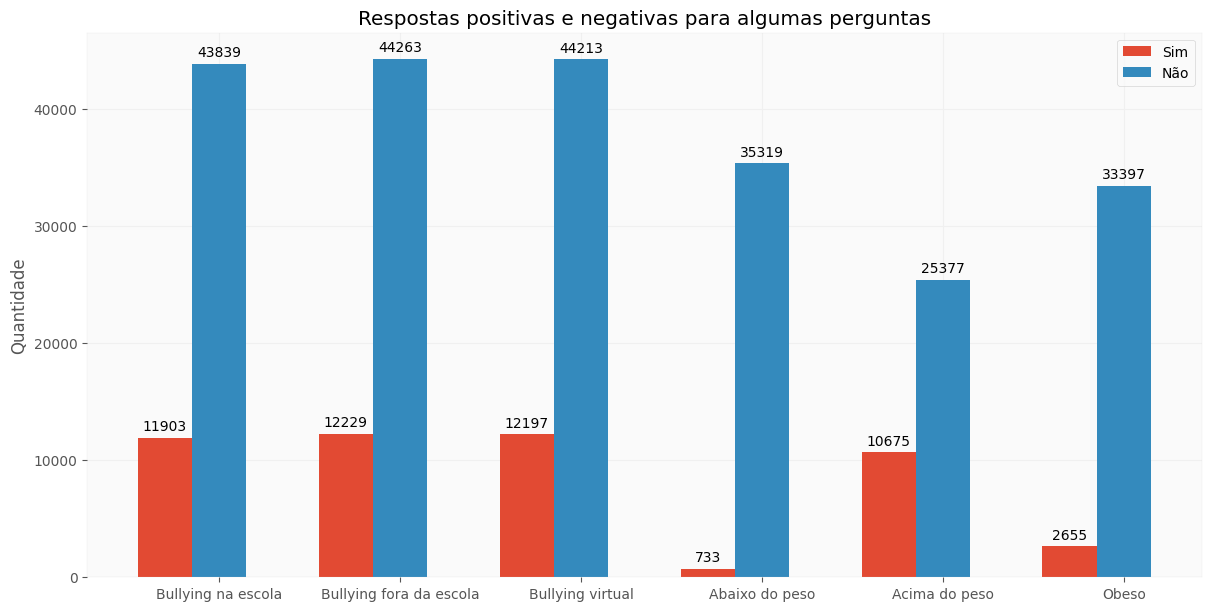

In [377]:
# Gráfico de barras agrupadas com rótulos
respontas = {
    'Sim': respostasYes,
    'Não': respostasNo,  
}

x = np.arange(len(perguntas))  # the label locations
width = 0.30  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (12, 6))

for attribute, measurement in respontas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('Respostas positivas e negativas para algumas perguntas')
ax.set_xticks(x + width, perguntas)
ax.legend(loc='upper right')
#ax.set_ylim(0, 250)

plt.show()

Bullying na escola         11903
Bullying fora da escola    12229
Bullying virtual           12197
Abaixo do peso               733
Acima do peso              10675
Obeso                       2655
dtype: int64


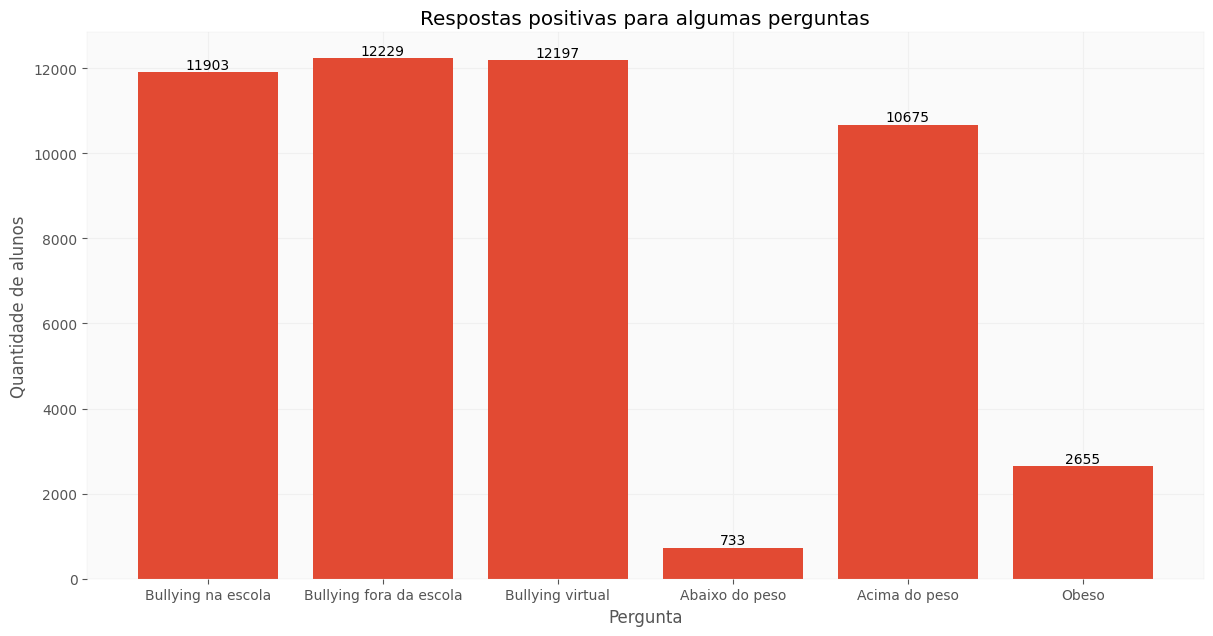

In [391]:
# Create a dictionary that maps column names to aggregation functions
agg_dict = {'Bullying na escola': lambda x: (x == 'Yes').sum(),
            'Bullying fora da escola': lambda x: (x == 'Yes').sum(),
            'Bullying virtual': lambda x: (x == 'Yes').sum(),
            'Abaixo do peso': lambda x: (x == 'Yes').sum(),
            'Acima do peso': lambda x: (x == 'Yes').sum(),
            'Obeso': lambda x: (x == 'Yes').sum()}

# Apply the aggregation functions to the DataFrame and store the result in a new DataFrame
counts = dados.agg(agg_dict)#.sort_values(ascending=True)
#print(counts)
# Print the resulting counts
#counts.plot.bar()

############
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 6))

# Plota o gráfico de barras
ax.bar(x = counts.index, height = counts.values)

# Acrescenta os valores sobre as barras
ax.bar_label(ax.containers[0]) # formatação do número com uma casa decimal

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Acrescenta um título ao gráfico
plt.title("Respostas positivas para algumas perguntas")

# Define os rótulos dos eixos
plt.ylabel('Quantidade de alunos')
plt.xlabel('Pergunta') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

In [384]:
# Create a data frame with fake data
df4 = pd.DataFrame({'nb_people':[8,31,14,20], 'group':["group A", "group B", "group C", "group D"] })
print(df4)
# plot it
#squarify.plot(sizes=df4['nb_people'], label=df4['group'], color=sns.color_palette("colorblind", 4), alpha=.9 ).set(title='Treemap with Squarify')

#plt.axis('off')
#plt.show()

   nb_people    group
0          8  group A
1         31  group B
2         14  group C
3         20  group D


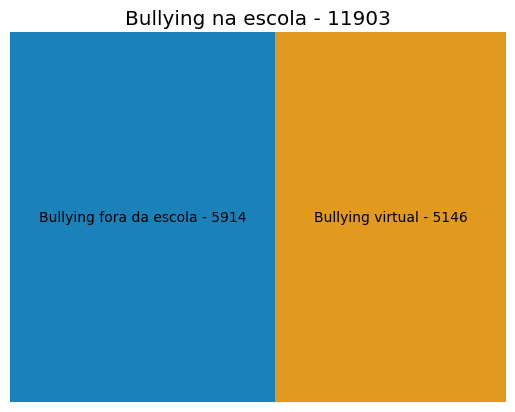

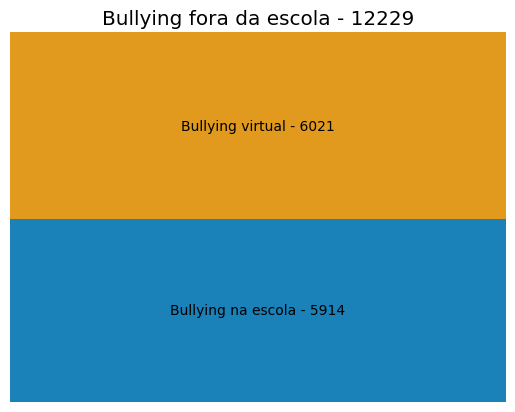

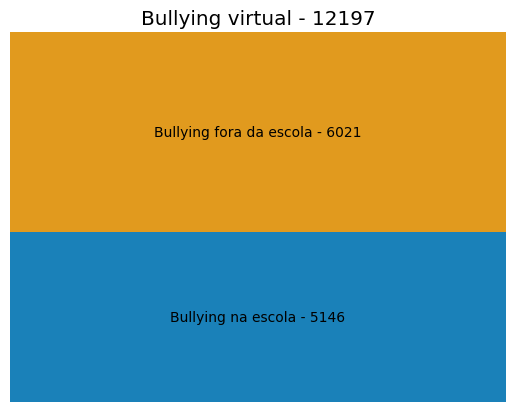

In [517]:
first_two_pairs = list(agg_dict.items())[:3]

colunas = ['Bullying na escola', 'Bullying fora da escola', 'Bullying virtual'] #, 'Abaixo do peso', 'Acima do peso', 'Obeso'
for column in colunas:
  #print('_______' + column + '_______')
  dadosColumn = dados[dados[column] == 'Yes']
  da = dadosColumn.loc[:, colunas].agg(dict(first_two_pairs))
  da = da.drop(labels=[column])
  new_index = []
  for index, value in da.items():
    new_index.append(index + " - " + str(value))
  da.index = new_index
  squarify.plot(sizes=da.values, label=da.index, color=sns.color_palette("colorblind", 3), alpha=.9 ).set(title=column+" - "+str(len(dadosColumn)))

  plt.axis('off')
  plt.show()
  
#dadosBullyng.loc[:, ['Bullying na escola', 'Felt_lonely', 'Se sente muito sozinho']].head(30)

In [ ]:
value_counts = dados['Abaixo do peso'].value_counts()
print(value_counts)


No     35319
Yes      733
Name: Abaixo do peso, dtype: int64


In [ ]:
value_counts = dados['Acima do peso'].value_counts()
print(value_counts)


No     25377
Yes    10675
Name: Acima do peso, dtype: int64


In [ ]:
value_counts = dados['Obeso'].value_counts()
print(value_counts)

No     33397
Yes     2655
Name: Obeso, dtype: int64


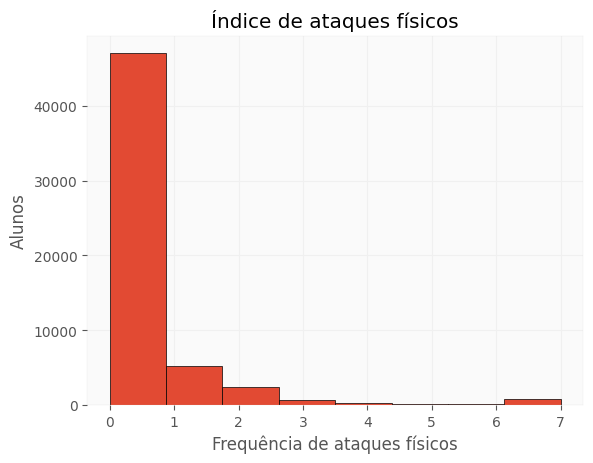

In [ ]:
# Histograma

# plotando o histograma
plt.hist(dados['amount_attacks'], bins=8, edgecolor='black')

# incluindo título do gráfico e legenda
plt.title('Índice de ataques físicos')
plt.ylabel('Alunos')
plt.xlabel('Frequência de ataques físicos');